In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
#To remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
data=pd.read_excel("/home/prerna/sample_service.xlsx")

In [3]:
inc=data.copy()

In [4]:
inc["ID_caller"]= inc["ID_caller"].str.replace("Caller", " ") 
inc["opened_by"]= inc["opened_by"].str.replace("Opened by", " ") 
inc["Created_by"]= inc["Created_by"].str.replace("Created by", " ") 
inc["Category Id"]= inc["Category Id"].str.replace("Subcategory", " ") 
inc["user_symptom"]=inc["user_symptom"].str.replace("Symptom", " ") 
inc["Support_group"]=inc["Support_group"].str.replace("Group", " ") 
inc["support_incharge"]=inc["support_incharge"].str.replace("Resolver", " ") 
inc["problem_ID"]=inc["problem_ID"].str.replace("Problem ID", " ") 
inc["updated_by"]= inc["updated_by"].str.replace("Updated by", " ") 

In [5]:
inc.rename({'Category Id':'Category_id'},axis=1, inplace=True)

In [6]:
inc=inc.replace("?",np.nan)
inc.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category_id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,2403,8,2016-02-29 01:16:00,6,...,170,72,56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,2403,8,2016-02-29 01:16:00,6,...,170,72,56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN


In [7]:
inc["target_impact"]=inc["impact"].apply(lambda x: int(x.split(' ')[0]))

In [8]:
inc["updated_day"]=pd.to_datetime(inc.updated_at).dt.day
inc["updated_month"]=pd.to_datetime(inc.updated_at).dt.month
inc["updated_year"]=pd.to_datetime(inc.updated_at).dt.year
inc["updated_hr"]=pd.to_datetime(inc.updated_at).dt.hour
inc["updated_minute"]=pd.to_datetime(inc.updated_at).dt.minute
inc["opened_at_day"]=pd.to_datetime(inc.opened_time).dt.day
inc["opened_at_month"]=pd.to_datetime(inc.opened_time).dt.month
inc["opened_at_year"]=pd.to_datetime(inc.opened_time).dt.year
inc["opened_at_hr"]=pd.to_datetime(inc.opened_time).dt.hour
inc["opened_at_minute"]=pd.to_datetime(inc.opened_time).dt.minute
inc["created_at_day"]=pd.to_datetime(inc.created_at).dt.day
inc["created_at_month"]=pd.to_datetime(inc.created_at).dt.month
inc["created_at_year"]=pd.to_datetime(inc.created_at).dt.year
inc["created_at_hr"]=pd.to_datetime(inc.created_at).dt.hour
inc["created_at_minute"]=pd.to_datetime(inc.created_at).dt.minute

In [9]:
incident=inc.copy()

In [10]:
incident.drop(['opened_time','created_at','updated_at','support_incharge','change_request','problem_ID'],axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
incident['ID_status']=number.fit_transform(incident['ID_status'])
incident['ID_status'].value_counts()
incident['active']=number.fit_transform(incident['active'])
incident['active'].value_counts()
incident['type_contact']=number.fit_transform(incident['type_contact'])
incident['type_contact'].value_counts()
incident['Doc_knowledge']=number.fit_transform(incident['Doc_knowledge'])
incident['Doc_knowledge'].value_counts()
incident['confirmation_check']=number.fit_transform(incident['confirmation_check'])
incident['confirmation_check'].value_counts()

0    339
1     10
Name: confirmation_check, dtype: int64

In [12]:
for columns in ['user_symptom','created_at_day','created_at_month','created_at_year','created_at_hr','created_at_minute']:
    median=incident[columns].median()
    incident[columns]=incident[columns].fillna(median)


In [13]:
incident.drop(['impact'],axis=1,inplace=True)

In [14]:
last= inc['target_impact']
incident.drop(labels=['target_impact'], axis=1,inplace = True)
incident.insert(33, 'target_impact', last)
incident.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,...,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute,target_impact
0,INC0000045,4,1,0,0,0,2403,8,6,21,...,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0,2
1,INC0000045,5,1,0,0,2,2403,8,6,642,...,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0,2


In [15]:
incident1=incident.copy()

In [16]:
incident["location"]= incident["location"].str.replace("Location", " ") 

In [17]:
incident.drop(['notify'],axis=1,inplace=True)

In [19]:
incident['ID']=incident['ID'].str.replace("INC", " ") 
incident.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,...,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute,target_impact
0,0000045,4,1,0,0,0,2403,8,6,21,...,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0,2
1,0000045,5,1,0,0,2,2403,8,6,642,...,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0,2


In [20]:
inc['Created_by'] = inc['Created_by'].astype(float)
inc['Created_by'].fillna((inc['Created_by'].mean()), inplace=True)
inc['Created_by'] = inc['Created_by'].astype(int)

In [21]:
incident3=incident.copy()

In [22]:
incident3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  349 non-null    object 
 1   ID_status           349 non-null    int64  
 2   active              349 non-null    int64  
 3   count_reassign      349 non-null    int64  
 4   count_opening       349 non-null    int64  
 5   count_updated       349 non-null    int64  
 6   ID_caller           349 non-null    object 
 7   opened_by           349 non-null    object 
 8   Created_by          287 non-null    object 
 9   updated_by          349 non-null    object 
 10  type_contact        349 non-null    int64  
 11  location            349 non-null    object 
 12  Category_id         349 non-null    object 
 13  user_symptom        349 non-null    object 
 14  Support_group       349 non-null    object 
 15  Doc_knowledge       349 non-null    int64  
 16  confirma

In [23]:
incident3['ID']=incident3['ID'].astype(int)

In [24]:
incident3['location']=incident3['location'].astype(int)
#df["a"] = df["a"].astype(str).astype(float)
incident3['ID']=incident3['ID'].astype(float).astype(int)
incident3['ID_caller']=incident3['ID_caller'].astype(int)
incident3['opened_by']=incident3['opened_by'].astype(int)
#incident3['Created_by']=incident3['Created_by'].astype(int)
incident3['updated_by']=incident3['updated_by'].astype(int)
incident3['location']=incident3['location'].astype(int)
incident3['Category_id']=incident3['Category_id'].astype(int)
incident3['user_symptom']=incident3['user_symptom'].astype(int)
incident3['Support_group']=incident3['Support_group'].astype(int)

In [25]:
incident3['Created_by'].fillna((incident3['Created_by'].median()), inplace=True)

In [26]:
incident3['Created_by']=incident3['Created_by'].astype(int)

In [27]:
incident3=incident3.replace({'type_contact': 0,'Doc_knowledge':0},1)

In [28]:
incident3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  349 non-null    int64  
 1   ID_status           349 non-null    int64  
 2   active              349 non-null    int64  
 3   count_reassign      349 non-null    int64  
 4   count_opening       349 non-null    int64  
 5   count_updated       349 non-null    int64  
 6   ID_caller           349 non-null    int64  
 7   opened_by           349 non-null    int64  
 8   Created_by          349 non-null    int64  
 9   updated_by          349 non-null    int64  
 10  type_contact        349 non-null    int64  
 11  location            349 non-null    int64  
 12  Category_id         349 non-null    int64  
 13  user_symptom        349 non-null    int64  
 14  Support_group       349 non-null    int64  
 15  Doc_knowledge       349 non-null    int64  
 16  confirma

In [29]:
#Spliting data

In [30]:
X=incident3.drop("target_impact",axis=1)
y=incident3["target_impact"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [32]:
y_train.shape, y_test.shape

((244,), (105,))

In [33]:
y_train.value_counts()/len(y_train)

2    0.905738
3    0.065574
1    0.028689
Name: target_impact, dtype: float64

In [34]:
y_test.value_counts()/len(y_test)

2    0.895238
1    0.057143
3    0.047619
Name: target_impact, dtype: float64

In [ ]:
#SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [36]:
counter = Counter(y_train)
print('Before',counter)

Before Counter({2: 221, 3: 16, 1: 7})


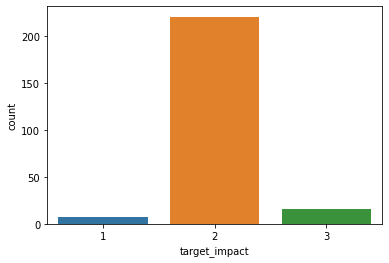

In [37]:
sns.countplot(y_train)

In [38]:
# oversampling the train dataset using SMOTE
smt = SMOTE()

In [39]:
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

After Counter({2: 221, 1: 221, 3: 221})


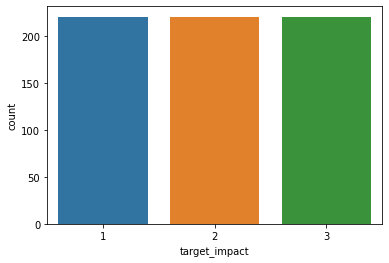

In [40]:
sns.countplot(y_train_sm)

In [ ]:
#Hybrid Technique
#SMOTE + Tomek Links

In [41]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)

Before Counter({2: 221, 3: 16, 1: 7})


In [42]:
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)


In [43]:
counter = Counter(y_train_smtom)
print('After',counter)

After Counter({1: 221, 2: 220, 3: 220})


In [44]:
#Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=30)
ordered_feature=ordered_rank_feature.fit(X_train_sm,y_train_sm)
ordered_feature

SelectKBest(k=30, score_func=<function chi2 at 0x7f106a3f3040>)

In [47]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(30,'scores')


,scores,0
6,113422.147468,ID_caller
7,33147.139970,opened_by
13,15668.486740,user_symptom
11,10098.346422,location
9,8992.061011,updated_by
14,2403.494963,Support_group
12,1807.806981,Category_id
26,1341.346441,opened_at_minute
8,666.945969,Created_by
31,380.356043,created_at_minute


In [48]:
#Extra Tree Classifier

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train_sm,y_train_sm)

ExtraTreesClassifier()

In [51]:
print(model.feature_importances_)

[0.04706575 0.02229879 0.00861357 0.02701178 0.00019867 0.01582771
 0.07152221 0.12307646 0.07147628 0.01314831 0.         0.11055032
 0.06245197 0.09057451 0.07870264 0.         0.00083625 0.01651141
 0.02109045 0.         0.01713977 0.00838346 0.         0.
 0.         0.05275233 0.07329902 0.         0.         0.
 0.0235397  0.04392863]


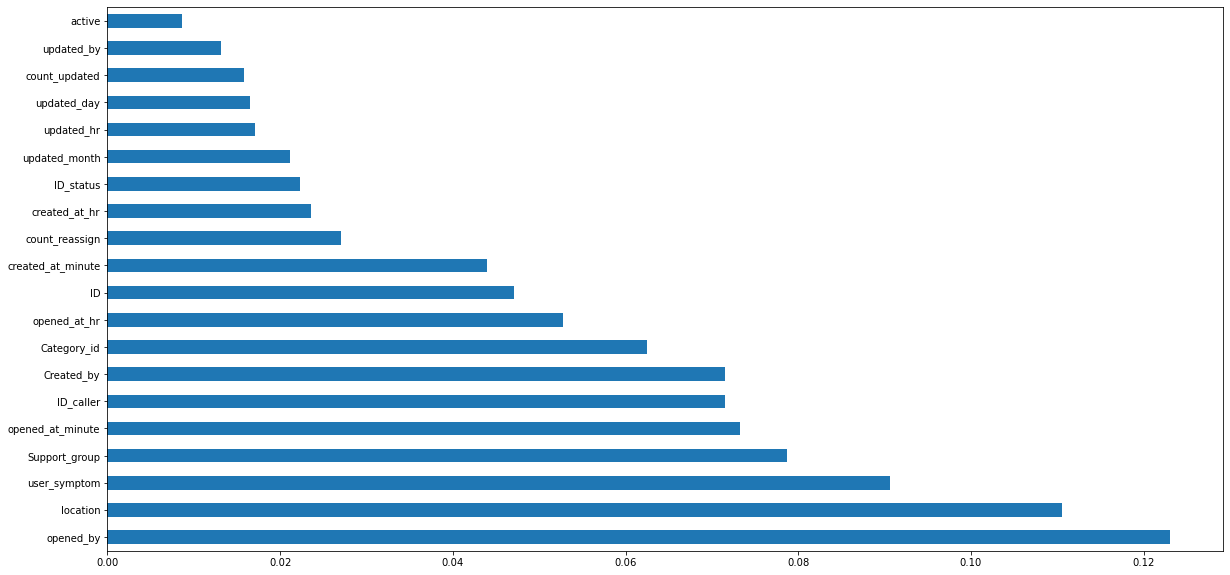

In [52]:
plt.figure(figsize=(20,10))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
from sklearn.feature_selection import mutual_info_classif

In [54]:
mutual_info=mutual_info_classif(X_train_sm,y_train_sm)

In [55]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Category_id           0.870900
ID_caller             0.853588
user_symptom          0.816122
created_at_minute     0.763249
location              0.723643
ID                    0.692884
opened_by             0.632737
opened_at_minute      0.591127
Support_group         0.584000
Created_by            0.542540
updated_by            0.405321
opened_at_hr          0.399138
count_updated         0.273874
created_at_hr         0.236245
count_reassign        0.227511
updated_hr            0.224889
updated_day           0.152995
ID_status             0.099267
updated_minute        0.091153
updated_month         0.046265
active                0.020814
type_contact          0.014666
created_at_month      0.002510
created_at_year       0.000000
count_opening         0.000000
created_at_day        0.000000
opened_at_year        0.000000
confirmation_check    0.000000
updated_year          0.000000
opened_at_day         0.000000
opened_at_month       0.000000
Doc_knowledge         0.000000
dtype: f

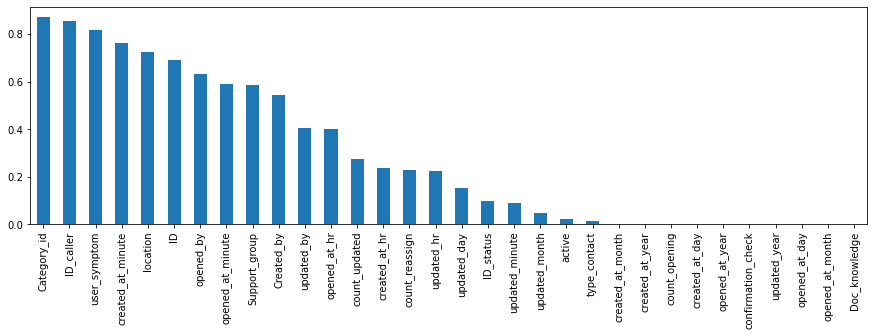

In [56]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))

In [57]:
#No we Will select the  top 10 important features
sel_top_cols = SelectKBest(mutual_info_classif, k=10)
sel_top_cols.fit(X_train_sm, y_train_sm)
X_train.columns[sel_top_cols.get_support()]

Index(['ID', 'ID_caller', 'opened_by', 'Created_by', 'location', 'Category_id',
       'user_symptom', 'Support_group', 'opened_at_minute',
       'created_at_minute'],
      dtype='object')

In [58]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [59]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

opened_by             0.376786
location              0.279649
ID_caller             0.156155
Category_id           0.108817
ID                    0.041778
opened_at_hr          0.032321
created_at_minute     0.004495
opened_at_year        0.000000
created_at_day        0.000000
ID_status             0.000000
active                0.000000
count_reassign        0.000000
count_opening         0.000000
count_updated         0.000000
created_at_year       0.000000
created_at_month      0.000000
Created_by            0.000000
updated_by            0.000000
type_contact          0.000000
opened_at_minute      0.000000
opened_at_month       0.000000
user_symptom          0.000000
Support_group         0.000000
created_at_hr         0.000000
confirmation_check    0.000000
updated_day           0.000000
updated_month         0.000000
updated_year          0.000000
updated_hr            0.000000
updated_minute        0.000000
opened_at_day         0.000000
Doc_knowledge         0.000000
dtype: f

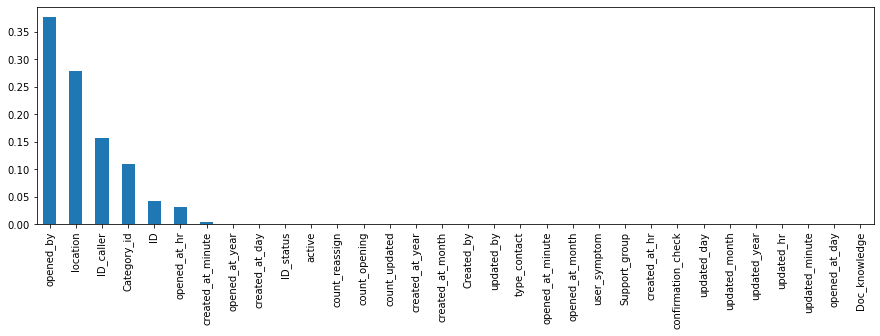

In [60]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

In [61]:
X_train_sm_new= X_train_sm[['opened_by','location','Category_id','ID']]
X_test_sm_new= X_test[['opened_by','location','Category_id','ID']]


In [62]:
X_train_sm_new

,opened_by,location,Category_id,ID
0,24,98,164,86
1,180,93,125,63
2,131,46,135,102
3,24,44,107,122
4,8,204,125,57
...,...,...,...,...
658,501,204,192,134
659,433,204,220,84
660,472,204,203,113
661,131,93,164,83


In [63]:
#Model Building

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(max_depth=27)
classifier.fit(X_train_sm_new,y_train_sm)

RandomForestClassifier(max_depth=27)

In [70]:
# Predicting the model
Y_predict_rf = classifier.predict(X_test_sm_new)

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [72]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import classification_report
print(accuracy_score(y_test,Y_predict_rf))
print(classification_report(y_test,Y_predict_rf))

0.9523809523809523
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      0.95      0.97        94
           3       0.62      1.00      0.77         5

    accuracy                           0.95       105
   macro avg       0.79      0.98      0.87       105
weighted avg       0.97      0.95      0.96       105



In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_predict_rf)

array([[ 6,  0,  0],
       [ 2, 89,  3],
       [ 0,  0,  5]])

In [74]:
print("Train Accuracy:",model.score(X_train_sm_new, y_train_sm)*100)
print("Test Accuracy:",model.score(X_test_sm_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 95.23809523809523


In [75]:
#Export Model

In [76]:
import pickle

In [77]:
pickle.dump(classifier, open('incident.pkl','wb'))


In [81]:
model = pickle.load(open('incident.pkl','rb'))
print(model.predict([[24,98,164,86]]))

[2]
